# 국경일, 공휴일을 캐치해서 0,1로 분류하는 함수

In [287]:
import pandas as pd
import datetime

In [ ]:
dt = datetime.datetime.now()
dt

In [398]:
data = pd.read_excel('../2020데이터/01_제공데이터/performance_data.xlsx',header = 1)

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
방송일시     38309 non-null datetime64[ns]
노출(분)    21525 non-null float64
마더코드     38309 non-null int64
상품코드     38309 non-null int64
상품명      38309 non-null object
상품군      38309 non-null object
판매단가     38309 non-null int64
취급액      37372 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [400]:
data['방송일시'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: 방송일시, dtype: int64

# 공공데이터 open api

In [295]:
# 파라미터
import requests
from bs4 import BeautifulSoup

year = '2019'
mykey = 'H2U3MYpA5cdO9eidjraO87W8mSVkIo77SNPtdNmNm31T33EFszX9mnbji8AFKCZka6jDsAHG%2BCga0yEkZCim%2Fw%3D%3D'

holiday_2019 = []

for month in range(1,13):
    # int형으로 받은 숫자 중 10이하 한자리 수면 0을 붙여서 string으로 변환하고,
    # 아니면 그대로 string형으로 변환
    if month < 10:
        month = '0' + str(month)
    else:
        month = str(month)

    url = ' http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getRestDeInfo?solYear=%s&solMonth=%s&ServiceKey=%s' % (year, month, mykey)
    
    get_data = requests.get(url)
    soup = BeautifulSoup(get_data.content, 'html.parser')
    table = soup.find_all('locdate')
    for i in table:
        holiday_2019.append(i.text)

In [298]:
holiday_2019

['20190101',
 '20190204',
 '20190205',
 '20190206',
 '20190301',
 '20190505',
 '20190506',
 '20190512',
 '20190606',
 '20190815',
 '20190912',
 '20190913',
 '20190914',
 '20191003',
 '20191009',
 '20191225']

# 휴일변수

In [401]:
holiday_2019 = pd.to_datetime(holiday_2019)

In [402]:
# (data['방송일시'].dt.date.isin(pd.to_datetime(holiday_2019)))
data['방송일시'].dt.date.isin(holiday_2019.date).head()

0    True
1    True
2    True
3    True
4    True
Name: 방송일시, dtype: bool

In [667]:
data['휴일변수'] = data['방송일시'].dt.weekday.isin([5,6]).values | (data['방송일시'].dt.date.isin(holiday_2019.date)).astype(int)

# 요일변수

# 요일변수

In [404]:
data['요일변수'] = data['방송일시'].dt.weekday

In [405]:
data['요일변수'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

# 주말 변수

# 주말변수 생성(주말:토(5), 일(6))

In [669]:
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,휴일변수,요일변수,주말변수,오전오후저녁,연속휴일변수,월급일변수,사분기변수,분기별변수,계절변수
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,True,1,False,0,False,False,0,False,3
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,True,1,False,0,False,False,0,False,3
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,True,1,False,0,False,False,0,False,3
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,True,1,False,0,False,False,0,False,3
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,True,1,False,0,False,False,0,False,3


# 오전오후저녁 변수

In [409]:
data['오전오후저녁'] = data['방송일시']

In [668]:
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,휴일변수,요일변수,주말변수,오전오후저녁,연속휴일변수,월급일변수,사분기변수,분기별변수,계절변수
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,True,1,False,0,False,False,0,False,3
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,True,1,False,0,False,False,0,False,3
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,True,1,False,0,False,False,0,False,3
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,True,1,False,0,False,False,0,False,3
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,True,1,False,0,False,False,0,False,3


In [429]:
data['오전오후저녁'].loc[data['방송일시'].dt.hour.isin(['6','7','8','9','10','11','12'])] = 0
data['오전오후저녁'].loc[data['방송일시'].dt.hour.isin(['13','14','15','16','17','18','19'])] = 1
data['오전오후저녁'].loc[data['방송일시'].dt.hour.isin(['20','21','22','23','0','1','2'])] = 2

In [430]:
data['오전오후저녁'].unique()

array([0, 1, 2], dtype=int64)

In [406]:
data['주말변수'] = data['요일변수'].isin([5,6]).values

# 월급일 변수

In [608]:
data['월급일변수'] = data['방송일시'].dt.day.isin([10,17,20,25])

# 연속 휴일 변수

In [502]:
df = pd.DataFrame(data.loc[data['방송일시'].dt.date.drop_duplicates().index][['휴일변수','방송일시']])

In [498]:
df.reset_index(drop=True,inplace=True)

In [508]:
  df['count'] = df.groupby((df['휴일변수'] != df['휴일변수'].shift(1)).cumsum()).cumcount()+1

In [510]:
df.loc[(df['count'] >= 3) & (df['휴일변수'] == True)]

,휴일변수,방송일시,count
3186,True,2019-02-04,3
3261,True,2019-02-05,4
3375,True,2019-02-06,5
5922,True,2019-03-03,3
13101,True,2019-05-06,3
27134,True,2019-09-14,3
27249,True,2019-09-15,4


In [529]:
date = df.loc[(df['count'] >= 3) & (df['휴일변수'] == True)]['방송일시'].dt.date.values

In [557]:
data['방송일시'].dt.date

0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
5        2019-01-01
6        2019-01-01
7        2019-01-01
8        2019-01-01
9        2019-01-01
10       2019-01-01
11       2019-01-01
12       2019-01-01
13       2019-01-01
14       2019-01-01
15       2019-01-01
16       2019-01-01
17       2019-01-01
18       2019-01-01
19       2019-01-01
20       2019-01-01
21       2019-01-01
22       2019-01-01
23       2019-01-01
24       2019-01-01
25       2019-01-01
26       2019-01-01
27       2019-01-01
28       2019-01-01
29       2019-01-01
            ...    
38279    2019-12-31
38280    2019-12-31
38281    2019-12-31
38282    2019-12-31
38283    2019-12-31
38284    2019-12-31
38285    2019-12-31
38286    2019-12-31
38287    2019-12-31
38288    2019-12-31
38289    2019-12-31
38290    2019-12-31
38291    2019-12-31
38292    2019-12-31
38293    2019-12-31
38294    2019-12-31
38295    2019-12-31
38296    2019-12-31
38297    2019-12-31


In [569]:
adddate = pd.to_datetime(['2019-02-02','2019-02-03','2019-03-01','2019-03-02','2019-05-04','2019-05-05','2019-09-12','2019-09-13']).date


In [576]:
data['연속휴일변수'] = data['방송일시']

In [586]:
data['연속휴일변수'].loc[(data['방송일시'].dt.date.isin(date)) | (data['방송일시'].dt.date.isin(adddate))] = True
data['연속휴일변수'].loc[~(data['방송일시'].dt.date.isin(date)) | (data['방송일시'].dt.date.isin(adddate))] = False

In [587]:
data['연속휴일변수'].unique()

array([False,  True])

# 반기별 변수

In [630]:
data['사분기변수'] = data['방송일시'].dt.quarter -1

In [631]:
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,휴일변수,요일변수,주말변수,오전오후저녁,연속휴일변수,월급일변수,사분기변수,분기별변수,계절변수
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,True,1,False,0,False,False,0,False,2019-01-01 06:00:00
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,True,1,False,0,False,False,0,False,2019-01-01 06:00:00
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,True,1,False,0,False,False,0,False,2019-01-01 06:20:00
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,True,1,False,0,False,False,0,False,2019-01-01 06:20:00
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,True,1,False,0,False,False,0,False,2019-01-01 06:40:00


# 분기별 변수

In [625]:
data['분기별변수'] = data['방송일시'].dt.month.isin(['7','8','9','10','11','12'])

In [626]:
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,휴일변수,요일변수,주말변수,오전오후저녁,연속휴일변수,월급일변수,사분기변수,분기별변수
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,True,1,False,0,False,False,1,False
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,True,1,False,0,False,False,1,False
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,True,1,False,0,False,False,1,False
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,True,1,False,0,False,False,1,False
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,True,1,False,0,False,False,1,False


# 계절변수

In [629]:
data['계절변수'] = data['방송일시']

In [632]:
data['계절변수'].loc[(data['방송일시'].dt.month.isin(['3','4','5']))] = 0
data['계절변수'].loc[(data['방송일시'].dt.month.isin(['6','7','8']))] = 1
data['계절변수'].loc[(data['방송일시'].dt.month.isin(['9','10','11']))] = 2
data['계절변수'].loc[(data['방송일시'].dt.month.isin(['12','1','2']))] = 3

In [633]:
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,휴일변수,요일변수,주말변수,오전오후저녁,연속휴일변수,월급일변수,사분기변수,분기별변수,계절변수
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,True,1,False,0,False,False,0,False,3
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,True,1,False,0,False,False,0,False,3
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,True,1,False,0,False,False,0,False,3
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,True,1,False,0,False,False,0,False,3
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,True,1,False,0,False,False,0,False,3


In [634]:
import seaborn as sns

In [674]:
da = data.drop(['노출(분)','상품명','상품군','방송일시'], axis=1)

In [675]:
da = da.dropna()

In [677]:
da.astype(int).head()

,마더코드,상품코드,판매단가,취급액,휴일변수,요일변수,주말변수,오전오후저녁,연속휴일변수,월급일변수,사분기변수,분기별변수,계절변수
0,100346,201072,39900,2099000,1,1,0,0,0,0,0,0,3
1,100346,201079,39900,4371000,1,1,0,0,0,0,0,0,3
2,100346,201072,39900,3262000,1,1,0,0,0,0,0,0,3
3,100346,201079,39900,6955000,1,1,0,0,0,0,0,0,3
4,100346,201072,39900,6672000,1,1,0,0,0,0,0,0,3


In [695]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [681]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [687]:
import matplotlib.pyplot as plt

In [688]:
plt.rcParams['font.family'] = 'NanumGothic'

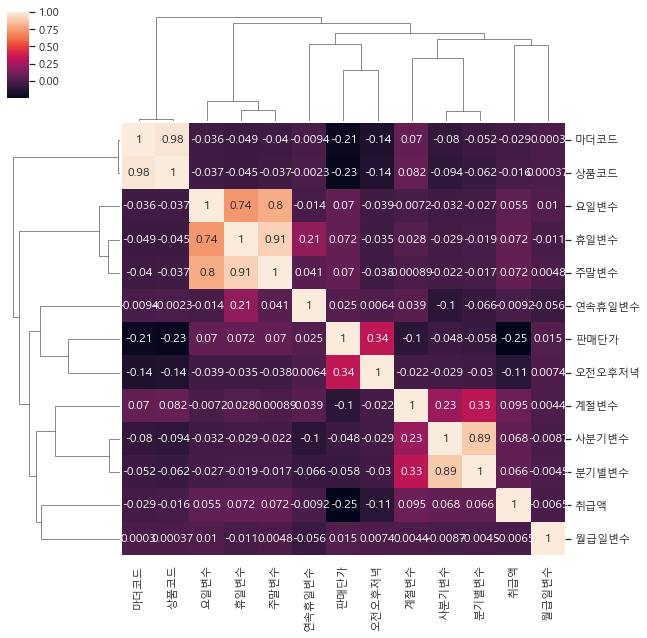

In [698]:
sns.clustermap(da.astype(int).corr(), annot=True)